## Feature importance testing by removing one measurement each time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# PredefinedSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
# loadings saved features that was prepared in data preparation file

from pickle import load
# load train_diagnose
train_diagnose= load(open('train_diagnose.pkl', 'rb'))
# load the NC data
fa_feature_all_locations_without_Nan = load(open('fa_feature_all_locations_without_Nan.pkl', 'rb'))
# load the NC_y data
md_feature_all_locations_without_Nan= load(open('md_feature_all_locations_without_Nan.pkl', 'rb'))

# load the AD_X data
rd_feature_all_locations_without_Nan= load(open('rd_feature_all_locations_without_Nan.pkl', 'rb'))
# load the AD_y data
ad_feature_all_locations_without_Nan= load(open('ad_feature_all_locations_without_Nan.pkl', 'rb'))

cl_feature_all_locations_without_Nan= load(open('cl_feature_all_locations_without_Nan.pkl', 'rb'))
# load the NC_y data
curvature_feature_all_locations_without_Nan= load(open('curvature_feature_all_locations_without_Nan.pkl', 'rb'))

# load the AD_X data
Torsion_feature_all_locations_without_Nan = load(open('Torsion_feature_all_locations_without_Nan.pkl', 'rb'))
# load the AD_y data
volume_feature_all_locations_without_Nan= load(open('volume_feature_all_locations_without_Nan.pkl', 'rb'))



# load the svc model
svc_final =load(open('svc_final_ADvsMCI_withVal.pkl', 'rb'))
# load the  randomforest
rf_final =load (open('rf_final_ADvsMCI_withVal.pkl', 'rb'))

# load the dt model
dt_final=load(open('dt_final_ADvsMCI_withVal.pkl', 'rb'))
# load the axgboost model
xgb_final= load (open('xgb_final_ADvsMCI_withVal.pkl', 'rb'))

In [3]:
from sklearn.pipeline import Pipeline
# creating a pipline to scale and redcue the dimensionality of all fetaures.
pipe = Pipeline([('scaler', MinMaxScaler(feature_range = (0, 1))),
                 ('pca', PCA(30))])

In [4]:
# applying the pipline to Fa feature to reduce its dimensilaity from 16000 to 30 
fa_feature_all_locations_scalPca=pipe.fit_transform(fa_feature_all_locations_without_Nan)
print(fa_feature_all_locations_scalPca.shape)
# applying the pipline to MD feature to reduce its dimensilaity from 16000 to 30 
md_feature_all_locations_scalPca=pipe.fit_transform(md_feature_all_locations_without_Nan)
print(md_feature_all_locations_scalPca.shape)
# applying the pipline to RD feature to reduce its dimensilaity from 16000 to 30 
rd_feature_all_locations_scalPca=pipe.fit_transform(rd_feature_all_locations_without_Nan)
print(rd_feature_all_locations_scalPca.shape)
# applying the pipline to AD feature to reduce its dimensilaity from 16000 to 30 
ad_feature_all_locations_scalPca=pipe.fit_transform(ad_feature_all_locations_without_Nan)
print(ad_feature_all_locations_scalPca.shape)
# applying the pipline to CL feature to reduce its dimensilaity from 16000 to 30 
cl_feature_all_locations_scalPca=pipe.fit_transform(cl_feature_all_locations_without_Nan)
print(cl_feature_all_locations_scalPca.shape)
# applying the pipline to curvature feature to reduce its dimensilaity from 16000 to 30 
curvature_feature_all_locations_scalPca=pipe.fit_transform(curvature_feature_all_locations_without_Nan)
print(curvature_feature_all_locations_scalPca.shape)
# applying the pipline to Torsion feature to reduce its dimensilaity from 16000 to 30 
Torsion_feature_all_locations_scalPca=pipe.fit_transform(Torsion_feature_all_locations_without_Nan)
print(Torsion_feature_all_locations_scalPca.shape)
# applying the pipline to Volume feature to reduce its dimensilaity from 16000 to 30 
volume_feature_all_locations_scalPca=pipe.fit_transform(volume_feature_all_locations_without_Nan)
print(volume_feature_all_locations_scalPca.shape)

(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)


In [5]:
# correcting mistakes of not using replaced nan values 
combined_features_scalPca=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [6]:
# combining Features and train diagnose 
CombinedFeatDig=np.concatenate((combined_features_scalPca,train_diagnose),axis=1)

In [7]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [8]:
# X=combined_features_without_Scaling
# X.shape
y=train_diagnose
y.shape



NMCI_data_x =combined_features_scalPca[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_features_scalPca[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(215, 240)
(215, 1)
(250, 240)
(250, 1)


In [9]:
# combining AD and MCI
ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 240)
(465, 1)


In [10]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 240)
(93, 240)


In [11]:
finalClassifiers=[svc_final,rf_final,dt_final,xgb_final]

feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    feature_entry.append([accuracy*100])
    
#     featureImportance_df["Without_FA"]=feature_entry[0:4]
    FeatureImportance_all=pd.DataFrame(feature_entry[0:4],columns=["All Features"])

    
print("="*30)
FeatureImportance_all.head(5)

# # feature_entry[0:4]
# FeatureImportance_FA

SVC
****Results****
Training 93.01%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 64.52%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 56.99%


,All Features
0,63.440860
1,64.516129
2,53.763441
3,56.989247


## AD vs NMCI Training without FA

In [12]:
np.random.seed(500)
#removing Fa from the data
combined_FA_Ex=np.concatenate((md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [13]:
# X=combined_features_without_Scaling
# X.shape
y=train_diagnose
y.shape
NC_data_x = combined_FA_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_FA_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_FA_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [14]:
# combining AD and MCI
ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [15]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [16]:
# finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
# featureImportance_cols=["Classifiers"]
# featureImportance_df = pd.DataFrame(columns=featureImportance_cols)
# feature_entry=[]
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    feature_entry.append([accuracy*100])
    
#     featureImportance_df["Without_FA"]=feature_entry[0:4]
    FeatureImportance_FA=pd.DataFrame(feature_entry[0:4],columns=["Without_FA"])

    
print("="*30)
# featureImportance_df.head(5)

# feature_entry[0:4]
FeatureImportance_FA

SVC
****Results****
Training 91.94%
Accuracy 62.37%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 64.52%
DecisionTreeClassifier
****Results****
Training 72.85%
Accuracy 51.61%
[00:43:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 54.84%


,Without_FA
0,62.365591
1,64.516129
2,51.612903
3,54.838710


## AD vs NMCI Training without MD

In [17]:

#removing MD from the data
combined_MD_Ex=np.concatenate((fa_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [18]:


NMCI_data_x =combined_MD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_MD_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [19]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [21]:
# featureImportance_cols=["Classifiers","Without_FA"]
# featureImportance_df = pd.DataFrame(columns=featureImportance_cols)
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_MD=pd.DataFrame(feature_entry[0:4],columns=["Without_MA"])
    
print("="*30)
FeatureImportance_MD



SVC
****Results****
Training 92.74%
Accuracy 64.52%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 61.29%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 54.84%


,Without_MA
0,64.516129
1,61.290323
2,53.763441
3,54.838710


## AD vs NMCI Training without RD

In [22]:
#removing RD from the data
combined_RD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [23]:

NMCI_data_x =combined_RD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_RD_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [24]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [26]:

feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_RD=pd.DataFrame(feature_entry[0:4],columns=["Without_RD"])
    
print("="*30)
FeatureImportance_RD

SVC
****Results****
Training 92.47%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 63.44%
DecisionTreeClassifier
****Results****
Training 73.39%
Accuracy 53.76%
[00:43:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 60.22%


,Without_RD
0,63.440860
1,63.440860
2,53.763441
3,60.215054


In [27]:
def models_trining_testing(X_train,y_train,X_test,y_test):
    feature_entry=[]
    for models in finalClassifiers:
        models.fit(X_train, y_train.ravel())
        name = models.__class__.__name__
        print("="*30)
        print(name)
        print('****Results****')
        train_predictions = models.predict(X_test)
        trainingscore=models.score(X_train, y_train.ravel())
        accuracy = accuracy_score(y_test.ravel(), train_predictions)
        print("Training {:.2%}".format(trainingscore))
        print("Accuracy {:.2%}".format(accuracy))
        feature_entry.append([accuracy*100])
        FeatureImportance_RD=pd.DataFrame(feature_entry[0:4],columns=["Without_RD"])
    
# print("="*30)
# FeatureImportance_RD
testing=models_trining_testing(X_train,y_train,X_test,y_test)
testing

SVC
****Results****
Training 92.47%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 63.44%
DecisionTreeClassifier
****Results****
Training 73.39%
Accuracy 53.76%
[00:43:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 60.22%


# AD vs MCI Training without AD

In [28]:
#removing AD from the data
combined_AD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [29]:
NC_data_x = combined_AD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_AD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_AD_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [30]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [32]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_AD=pd.DataFrame(feature_entry[0:4],columns=["Without_AD"])
    
print("="*30)
FeatureImportance_AD

SVC
****Results****
Training 91.94%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 67.74%
DecisionTreeClassifier
****Results****
Training 73.66%
Accuracy 54.84%
[00:43:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 52.69%


,Without_AD
0,63.440860
1,67.741935
2,54.838710
3,52.688172


# AD vs MCI Training without CL

In [33]:
#removing cl from the data
combined_CL_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [34]:
NC_data_x = combined_CL_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CL_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_CL_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [35]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [37]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_CL=pd.DataFrame(feature_entry[0:4],columns=["Without_CL"])
    
print("="*30)
FeatureImportance_CL

SVC
****Results****
Training 92.47%
Accuracy 64.52%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 67.74%
DecisionTreeClassifier
****Results****
Training 72.04%
Accuracy 58.06%
[00:43:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 66.67%


,Without_CL
0,64.516129
1,67.741935
2,58.064516
3,66.666667


# AD vs MCI Training without Curvature

In [38]:
#removing Curvature from the data
combined_CUR_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [39]:
NC_data_x = combined_CUR_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CUR_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_CUR_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [40]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [42]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_cur=pd.DataFrame(feature_entry[0:4],columns=["Without_Curvature"])
    
print("="*30)
FeatureImportance_cur

SVC
****Results****
Training 91.40%
Accuracy 61.29%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 62.37%
DecisionTreeClassifier
****Results****
Training 72.31%
Accuracy 52.69%
[00:43:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 61.29%


,Without_Curvature
0,61.290323
1,62.365591
2,52.688172
3,61.290323


# AD vs MCI Training without Torsion

In [43]:
#removing Torsion from the data
combined_Tor_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        volume_feature_all_locations_scalPca),axis=1)

In [44]:
NC_data_x = combined_Tor_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Tor_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_Tor_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [45]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [47]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_tor=pd.DataFrame(feature_entry[0:4],columns=["Without_Torsion"])
    
print("="*30)
FeatureImportance_tor

SVC
****Results****
Training 92.74%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 65.59%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 59.14%


,Without_Torsion
0,63.440860
1,65.591398
2,53.763441
3,59.139785


# AD vs MCI Training without Volume

In [48]:
#removing Volume from the data
combined_Vol_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca),axis=1)

In [49]:
NC_data_x = combined_Vol_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Vol_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_Vol_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [50]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [52]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_vol=pd.DataFrame(feature_entry[0:4],columns=["Without_Volume"])
    classifierss=["SVM","Random_Forest","Decision_Tree","XG_Boost"]
    classifierss_df=pd.DataFrame(classifierss[0:4],columns=["Models"])
    
print("="*30)
FeatureImportance_all=pd.concat((classifierss_df,FeatureImportance_all,FeatureImportance_FA,FeatureImportance_MD,FeatureImportance_RD,FeatureImportance_AD,FeatureImportance_CL,FeatureImportance_cur,FeatureImportance_tor,FeatureImportance_vol),axis=1)
# FeatureImportance_all
df_t = FeatureImportance_all.T
#grab the first row for the column
df_t=df_t.rename(columns=df_t.iloc[0])
df_t=df_t[1:] #take the data less the header row
df_t


SVC
****Results****
Training 90.32%
Accuracy 69.89%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 62.37%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 65.59%


,SVM,Random_Forest,Decision_Tree,XG_Boost
All Features,63.4409,64.5161,53.7634,56.9892
Without_FA,62.3656,64.5161,51.6129,54.8387
Without_MA,64.5161,61.2903,53.7634,54.8387
Without_RD,63.4409,63.4409,53.7634,60.2151
Without_AD,63.4409,67.7419,54.8387,52.6882
Without_CL,64.5161,67.7419,58.0645,66.6667
Without_Curvature,61.2903,62.3656,52.6882,61.2903
Without_Torsion,63.4409,65.5914,53.7634,59.1398
Without_Volume,69.8925,62.3656,53.7634,65.5914


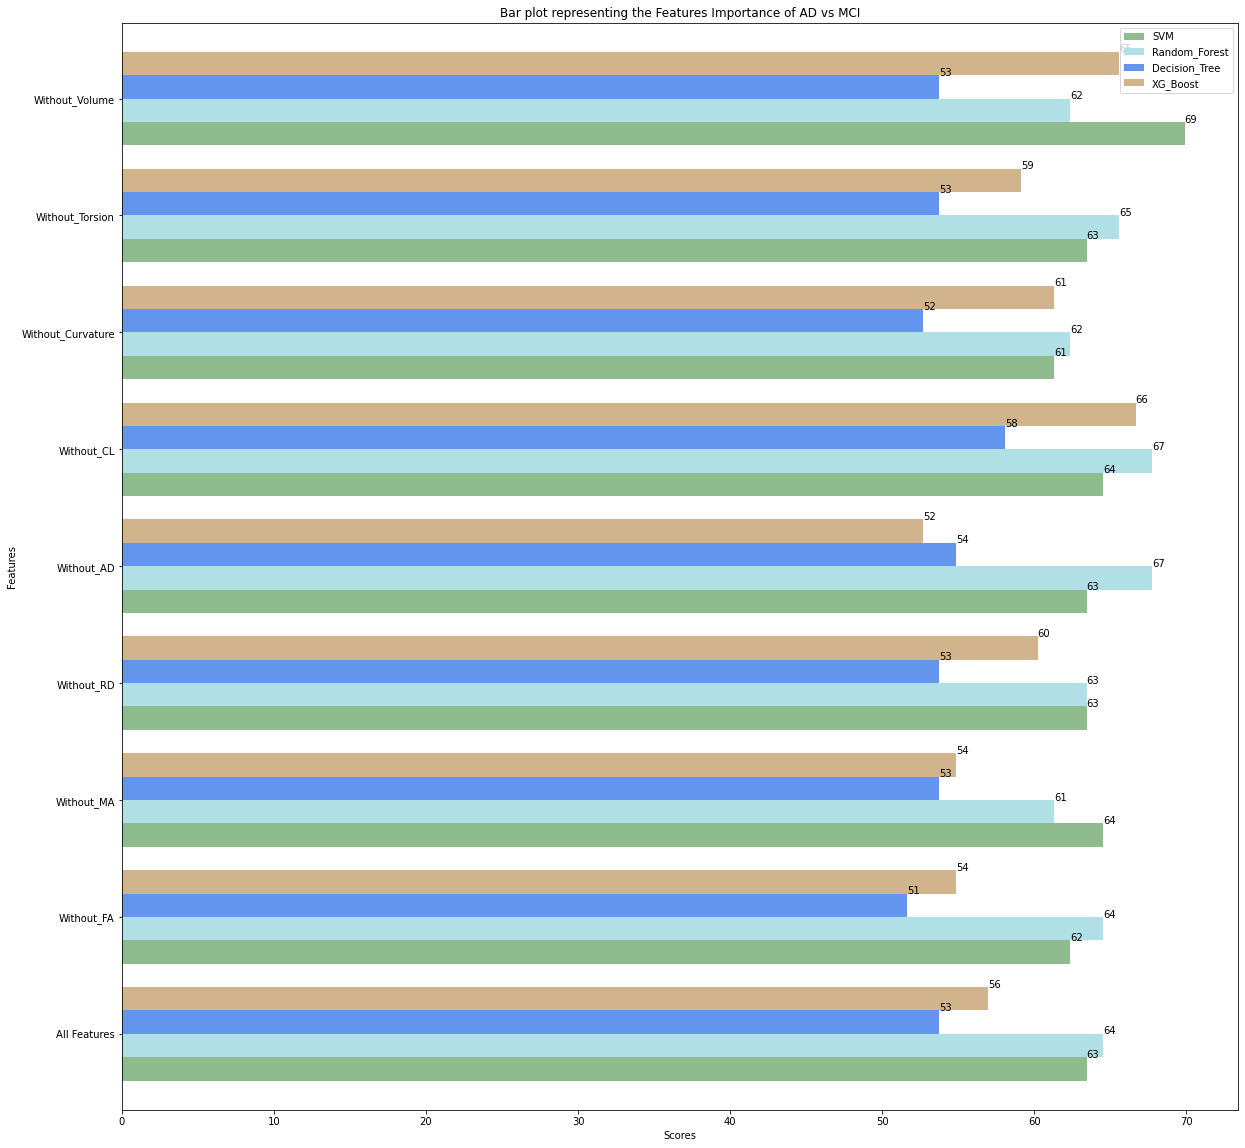

In [53]:
barplot=df_t.plot(kind='barh',figsize=(20,20),width=.8,color=["darkseagreen","powderblue","cornflowerblue","tan"])

# for loop to get the accuracy text label by using the widthvalue of the bars
for p in barplot.patches:
                _x = p.get_x() + p.get_width() 
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                barplot.text(_x, _y, value, ha="left")
# Giving the title for the plot
plt.title("Bar plot representing the Features Importance of AD vs MCI")
# Namimg the x and y axis
plt.ylabel('Features')
plt.xlabel('Scores')
plt.show()

# NC vs MCI  Feature Importance.

## Feature importance testing by removing one measurement each time.

In [54]:

combined_features_withScalPCA=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [55]:
# load the svc model
svc_final =load(open('svc_final_NCvsMCI_withVal.pkl', 'rb'))
# load the  randomforest
rf_final =load (open('rf_final_NCvsMCI_withVal.pkl', 'rb'))

# load the dt model
dt_final=load(open('dt_final_NCvsMCI_withVal.pkl', 'rb'))
# load the axgboost model
xgb_final= load (open('xgb_final_NCvsMCI_withVal.pkl', 'rb'))

In [56]:
# Normal Control vs MCI
y=train_diagnose
y.shape
NC_data_x = combined_features_withScalPCA[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_features_withScalPCA[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 240)
(235, 1)
(215, 240)
(215, 1)


In [57]:
# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 240)
(450, 1)


In [58]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)



(360, 240)
(90, 240)


In [59]:
finalClassifiers=[svc_final,rf_final,dt_final,xgb_final]

feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    feature_entry.append([accuracy*100])
    

    FeatureImportance_all=pd.DataFrame(feature_entry[0:4],columns=["All Features"])

    
print("="*30)
FeatureImportance_all.head(5)


SVC
****Results****
Training 94.72%
Accuracy 53.33%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 58.89%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 100.00%
Accuracy 56.67%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,All Features
0,53.333333
1,58.888889
2,53.333333
3,56.666667


## NC vs NMCI Training without FA

In [60]:

#removing Fa from the data
combined_FA_Ex=np.concatenate((md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [61]:
# X=combined_features_without_Scaling
# X.shape
y=train_diagnose
y.shape
NC_data_x = combined_FA_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_FA_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [62]:
# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [63]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [64]:
# making a list tos ave the result to it
feature_entry=[]
# for loop for traning and testing of the four models
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
#     appeending the accauracy of the models into the feature_entry
    feature_entry.append([accuracy*100])
# saving the feature importanc einto data frame.
    FeatureImportance_FA=pd.DataFrame(feature_entry[0:4],columns=["Without_FA"])

    
print("="*30)

FeatureImportance_FA

SVC
****Results****
Training 94.72%
Accuracy 55.56%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 56.67%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 99.72%
Accuracy 58.89%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_FA
0,55.555556
1,56.666667
2,53.333333
3,58.888889


## NC  vs NMCI Training without MD

In [65]:

#removing MD from the data
combined_MD_Ex=np.concatenate((fa_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [66]:
NC_data_x = combined_MD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_MD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [67]:
# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [69]:
# list to save the accuarcy of the models
feature_entry=[]

# for loop for training and testing all four models and then saving teh result to the list mentioned above
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    # appending the accauracy of the models into the feature_entry
    feature_entry.append([accuracy*100])
    # saving the feature importanc einto data frame.

    FeatureImportance_MD=pd.DataFrame(feature_entry[0:4],columns=["Without_MA"])
    
print("="*30)
FeatureImportance_MD



SVC
****Results****
Training 96.11%
Accuracy 54.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 60.00%
DecisionTreeClassifier
****Results****
Training 73.06%
Accuracy 55.56%
XGBClassifier
****Results****
Training 100.00%
Accuracy 54.44%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_MA
0,54.444444
1,60.000000
2,55.555556
3,54.444444


## NC  vs NMCI Training without RD

In [70]:
#removing RD from the data
combined_RD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [71]:
NC_data_x = combined_RD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_RD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [72]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [74]:
 # list to save the accuarcy of the models
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
  
    # appending the accauracy of the models into the feature_entry
    feature_entry.append([accuracy*100])
    # saving the feature importanc einto data frame.

    FeatureImportance_RD=pd.DataFrame(feature_entry[0:4],columns=["Without_RD"])
    
print("="*30)
FeatureImportance_RD

SVC
****Results****
Training 95.83%
Accuracy 55.56%
RandomForestClassifier
****Results****
Training 99.72%
Accuracy 52.22%
DecisionTreeClassifier
****Results****
Training 71.94%
Accuracy 51.11%
XGBClassifier
****Results****
Training 100.00%
Accuracy 61.11%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_RD
0,55.555556
1,52.222222
2,51.111111
3,61.111111


# NC  vs MCI Training without AD

In [75]:
#removing AD from the data
combined_AD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [76]:
NC_data_x = combined_AD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_AD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [77]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [79]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_AD=pd.DataFrame(feature_entry[0:4],columns=["Without_AD"])
    
print("="*30)
FeatureImportance_AD

SVC
****Results****
Training 94.17%
Accuracy 52.22%
RandomForestClassifier
****Results****
Training 98.89%
Accuracy 57.78%
DecisionTreeClassifier
****Results****
Training 69.17%
Accuracy 48.89%
XGBClassifier
****Results****
Training 100.00%
Accuracy 57.78%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_AD
0,52.222222
1,57.777778
2,48.888889
3,57.777778


# NC vs MCI Training without CL

In [80]:
#removing cl from the data
combined_CL_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [81]:
NC_data_x = combined_CL_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CL_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)



(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [82]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [84]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_CL=pd.DataFrame(feature_entry[0:4],columns=["Without_CL"])
    
print("="*30)
FeatureImportance_CL

SVC
****Results****
Training 93.06%
Accuracy 52.22%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 55.56%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 100.00%
Accuracy 56.67%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_CL
0,52.222222
1,55.555556
2,53.333333
3,56.666667


# NC  vs MCI Training without Curvature

In [85]:
#removing Curvature from the data
combined_CUR_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [86]:
NC_data_x = combined_CUR_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CUR_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)



(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [87]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [89]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_cur=pd.DataFrame(feature_entry[0:4],columns=["Without_Curvature"])
    
print("="*30)
FeatureImportance_cur

SVC
****Results****
Training 93.61%
Accuracy 54.44%
RandomForestClassifier
****Results****
Training 97.50%
Accuracy 53.33%
DecisionTreeClassifier
****Results****
Training 69.44%
Accuracy 53.33%
XGBClassifier
****Results****
Training 99.72%
Accuracy 57.78%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_Curvature
0,54.444444
1,53.333333
2,53.333333
3,57.777778


# NC vs MCI Training without Torsion

In [90]:
#removing Torsion from the data
combined_Tor_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        volume_feature_all_locations_scalPca),axis=1)

In [91]:
NC_data_x = combined_Tor_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Tor_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [92]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [94]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_tor=pd.DataFrame(feature_entry[0:4],columns=["Without_Torsion"])
    
print("="*30)
FeatureImportance_tor

SVC
****Results****
Training 93.89%
Accuracy 53.33%
RandomForestClassifier
****Results****
Training 97.50%
Accuracy 53.33%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 100.00%
Accuracy 60.00%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_Torsion
0,53.333333
1,53.333333
2,53.333333
3,60.000000


# NC  vs MCI Training without Volume

In [95]:
#removing Volume from the data
combined_Vol_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca),axis=1)

In [96]:
NC_data_x = combined_Vol_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Vol_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)



(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [97]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [99]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_vol=pd.DataFrame(feature_entry[0:4],columns=["Without_Volume"])
    classifierss=["SVM","Random_Forest","Decision_Tree","XG_Boost"]
    classifierss_df=pd.DataFrame(classifierss[0:4],columns=["Models"])
    
print("="*30)
FeatureImportance_all=pd.concat((classifierss_df,FeatureImportance_all,FeatureImportance_FA,FeatureImportance_MD,FeatureImportance_RD,FeatureImportance_AD,FeatureImportance_CL,FeatureImportance_cur,FeatureImportance_tor,FeatureImportance_vol),axis=1)
# FeatureImportance_all
df_t = FeatureImportance_all.T
#grab the first row for the column
df_t=df_t.rename(columns=df_t.iloc[0])
df_t=df_t[1:] #take the data less the header row
df_t


SVC
****Results****
Training 92.78%
Accuracy 54.44%
RandomForestClassifier
****Results****
Training 99.17%
Accuracy 56.67%
DecisionTreeClassifier
****Results****
Training 71.11%
Accuracy 41.11%
XGBClassifier
****Results****
Training 100.00%
Accuracy 61.11%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,SVM,Random_Forest,Decision_Tree,XG_Boost
All Features,53.3333,58.8889,53.3333,56.6667
Without_FA,55.5556,56.6667,53.3333,58.8889
Without_MA,54.4444,60,55.5556,54.4444
Without_RD,55.5556,52.2222,51.1111,61.1111
Without_AD,52.2222,57.7778,48.8889,57.7778
Without_CL,52.2222,55.5556,53.3333,56.6667
Without_Curvature,54.4444,53.3333,53.3333,57.7778
Without_Torsion,53.3333,53.3333,53.3333,60
Without_Volume,54.4444,56.6667,41.1111,61.1111


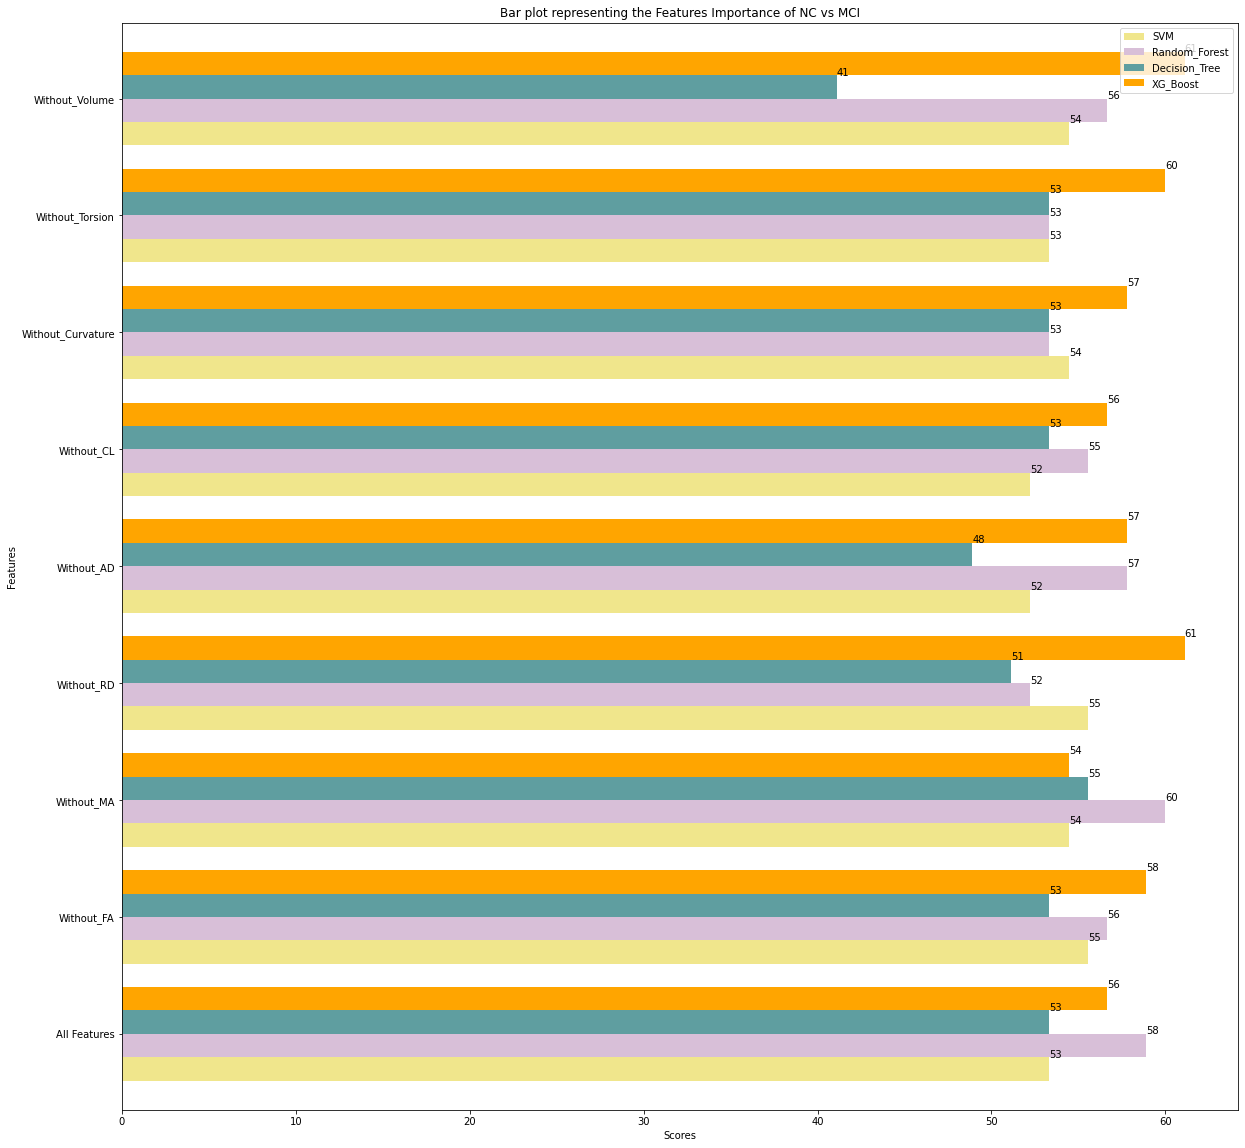

In [100]:
barplot=df_t.plot(kind='barh',figsize=(20,20),width=.8,color=["khaki","thistle","cadetblue","orange"])

for p in barplot.patches:
                _x = p.get_x() + p.get_width() 
               
                _y = p.get_y() + p.get_height()

                value = int(p.get_width())
                barplot.text(_x, _y, value, ha="left")
# Giving the title for the plot
plt.title("Bar plot representing the Features Importance of NC vs MCI")
# Namimg the x and y axis
plt.ylabel('Features')
plt.xlabel('Scores')
plt.show()
